<a href="https://colab.research.google.com/github/Andrewsefa/INSE-6220-Project/blob/main/Andrew_Arko__40290415_INSE6220.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install PyCaret**

PyCaret is an open-source, low-code machine learning library in Python designed to make the end-to-end machine learning process easier and faster for both beginners and experienced data scientists. It offers a variety of tools and functions for data preparation, model training, model selection, and deployment.

pip3 install pycaret==2.3.6 is a command used to install a specific version of the PyCaret library in Python. If you encounter an error message, try running the code again.

In [ ]:
# install slim version (default)
!pip install pycaret

In [ ]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'3.3.2'

**Install Analysis Extras for Explainable AI**

In [ ]:
!pip install pycaret[analysis]

## **Principal Component Analysis**

PCA stands for Principal Component Analysis, and it is a widely used technique in data analysis and machine learning for reducing the dimensionality of large datasets. The basic idea behind PCA is to transform a set of high-dimensional variables into a smaller set of uncorrelated variables called principal components, while retaining as much of the original variance as possible.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  2.1.4
Seaborn version:  0.13.2


**Dataset**

Predicting the age of abalone from physical measurements. Abalone is a type of edible sea mollusk belonging to the genus Haliotis. It is a marine gastropod mollusk with a single, flat, and oval-shaped shell that has a row of respiratory pores along its outer edge. Abalones are also known as ear shells, sea ears, or muttonfish in different regions. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope.  Other measurements, which are easier to obtain, are used to predict the age.  Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

Given is the attribute name, attribute type, the measurement unit and a brief description.  The number of rings is the value to predict: either as a continuous value or as a classification problem.


Name / Data Type / Measurement Unit / Description / Short Description

Sex / nominal / -- / M, F, and I (infant) / S
Length / continuous / mm / Longest shell measurement / LS
Diameter	/ continuous / mm / perpendicular to length / DM
Height / continuous / mm / with meat in shell / HT
Whole weight / continuous / grams / whole abalone / WW
Shucked weight / continuous	 / grams / weight of meat / SW
Viscera weight / continuous / grams / gut weight (after bleeding) / VW
Shell weight / continuous / grams / after being dried / WS
Rings / integer / -- / gives the age range (<=10 - small, <=20 - medium, <=30 - large) / RS



In [ ]:
def categorize(value):
    if 0 <= value <= 10:
        return 'small'
    elif 10 < value <= 20:
        return 'medium'
    elif 20 < value <= 30:
        return 'large'
    else:
        return 'unknown'

In [ ]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/Andrewsefa/INSE-6220-Project/refs/heads/main/abalone.csv')
df['S'] = df['S'].map({'M': 0, 'F': 1, 'I':2})
df['RS'] = df['RS'].apply(categorize)
df.head(25)

S     LS     DM     HT      WW      SW      VW     WS      RS
0   0  0.455  0.365  0.095  0.5140  0.2245  0.1010  0.150  medium
1   0  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.070   small
2   1  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.210   small
3   0  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.155   small
4   2  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.055   small
5   2  0.425  0.300  0.095  0.3515  0.1410  0.0775  0.120   small
6   1  0.530  0.415  0.150  0.7775  0.2370  0.1415  0.330  medium
7   1  0.545  0.425  0.125  0.7680  0.2940  0.1495  0.260  medium
8   0  0.475  0.370  0.125  0.5095  0.2165  0.1125  0.165   small
9   1  0.550  0.440  0.150  0.8945  0.3145  0.1510  0.320  medium
10  1  0.525  0.380  0.140  0.6065  0.1940  0.1475  0.210  medium
11  0  0.430  0.350  0.110  0.4060  0.1675  0.0810  0.135   small
12  0  0.490  0.380  0.135  0.5415  0.2175  0.0950  0.190  medium
13  1  0.535  0.405  0.145  0.6845  0.2725  0.1710  0.205   small
14  1  0.470  0.355  0.100  0.4755  0.1675  0.0805  0.185   small
15  0  0.500  0.400  0.130  0.6645  0.2580  0.1330  0.240  medium
16  2  0.355  0.280  0.085  0.2905  0.0950  0.0395  0.115   small
17  1  0.440  0.340  0.100  0.4510  0.1880  0.0870  0.130   small
18  0  0.365  0.295  0.080  0.2555  0.0970  0.0430  0.100   small
19  0  0.450  0.320  0.100  0.3810  0.1705  0.0750  0.115   small
20  0  0.355  0.280  0.095  0.2455  0.0955  0.0620  0.075  medium
21  2  0.380  0.275  0.100  0.2255  0.0800  0.0490  0.085   small
22  1  0.565  0.440  0.155  0.9395  0.4275  0.2140  0.270  medium
23  1  0.550  0.415  0.135  0.7635  0.3180  0.2100  0.200   small
24  1  0.615  0.480  0.165  1.1615  0.5130  0.3010  0.305   small

**Import Libraries**

**Read the dataset**

**pd.read_csv** is a function in the pandas library in Python that is used to read a CSV (Comma Separated Values) file and convert it into a pandas DataFrame.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   S       4177 non-null   int64  
 1   LS      4177 non-null   float64
 2   DM      4177 non-null   float64
 3   HT      4177 non-null   float64
 4   WW      4177 non-null   float64
 5   SW      4177 non-null   float64
 6   VW      4177 non-null   float64
 7   WS      4177 non-null   float64
 8   RS      4177 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


In [ ]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [ ]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


In [ ]:
df=df.drop_duplicates()

**Exploratory Data Analysis**

**sns.pairplot** is a function in the seaborn library in Python that is used to plot pairwise relationships between multiple variables in a dataset. The resulting plot is a grid of scatterplots, with each variable plotted against every other variable.

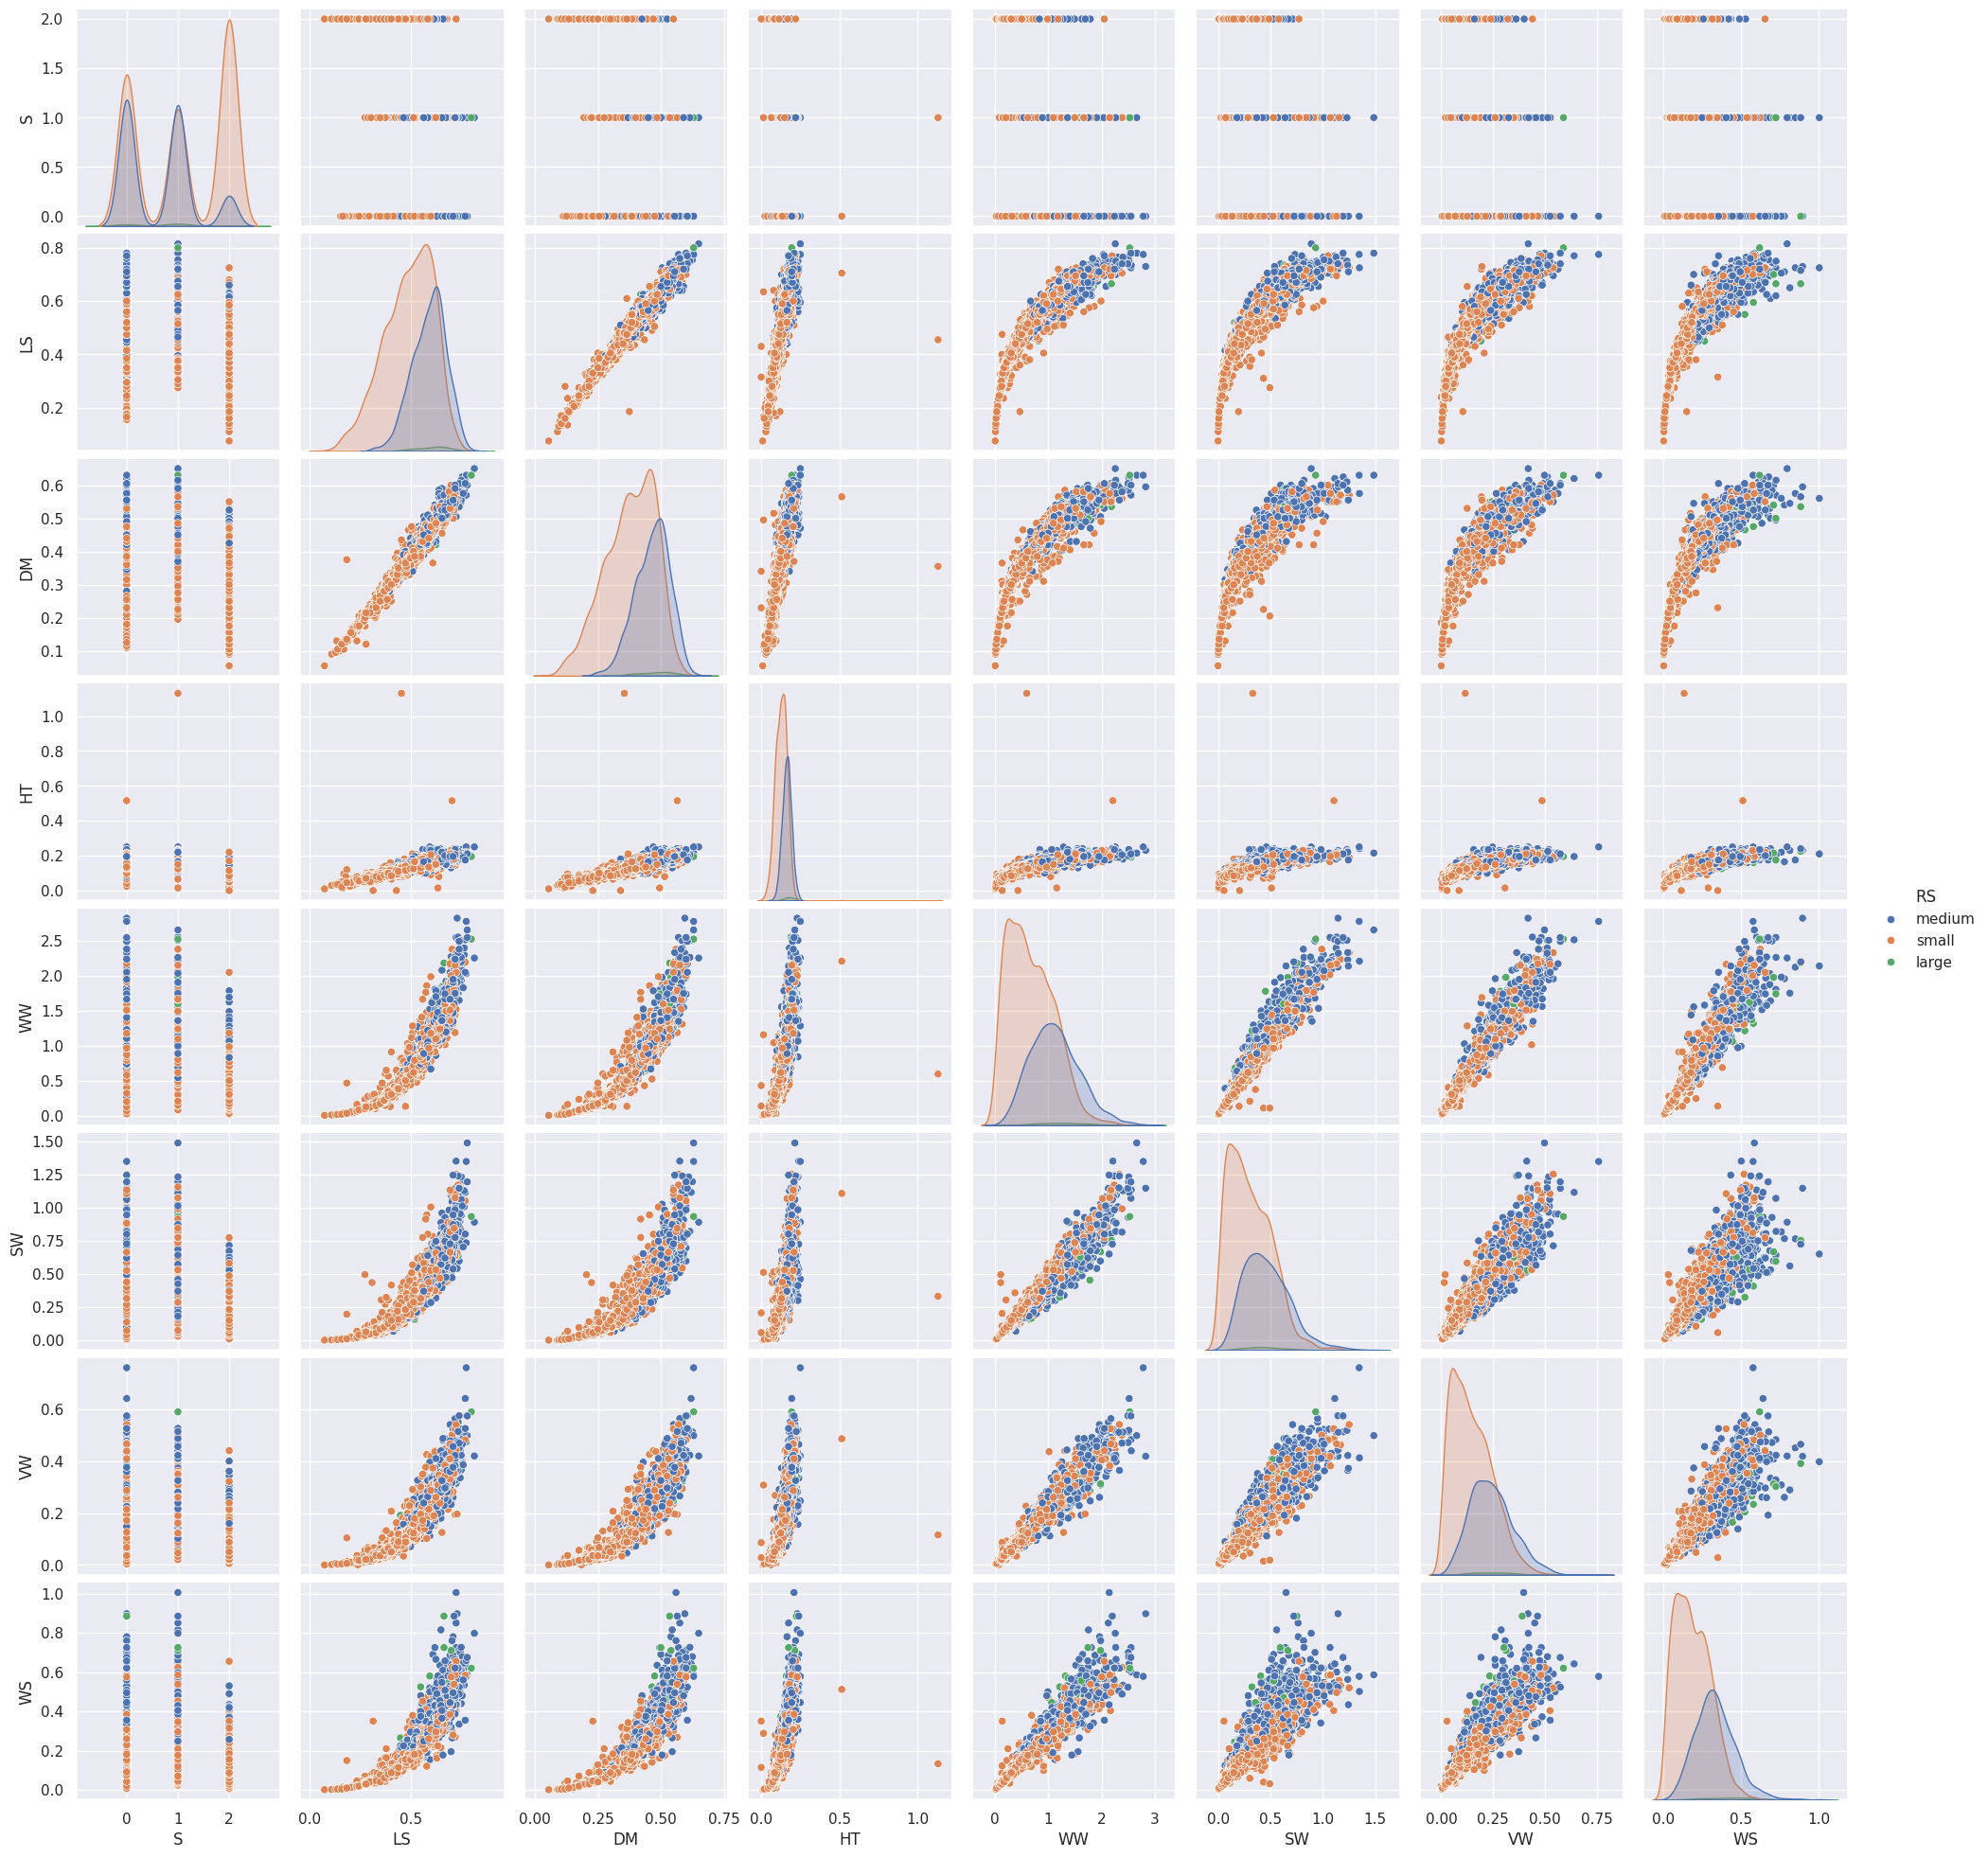

In [ ]:
sns.pairplot(df, hue='RS')
plt.show()

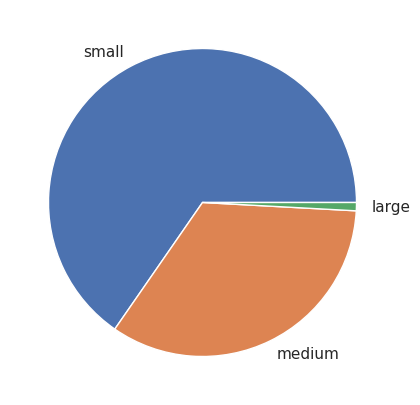

In [ ]:
y =df['RS']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [ ]:
X = df.drop(columns=['RS'])
X.head(10)

S     LS     DM     HT      WW      SW      VW     WS
0  0  0.455  0.365  0.095  0.5140  0.2245  0.1010  0.150
1  0  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.070
2  1  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.210
3  0  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.155
4  2  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.055
5  2  0.425  0.300  0.095  0.3515  0.1410  0.0775  0.120
6  1  0.530  0.415  0.150  0.7775  0.2370  0.1415  0.330
7  1  0.545  0.425  0.125  0.7680  0.2940  0.1495  0.260
8  0  0.475  0.370  0.125  0.5095  0.2165  0.1125  0.165
9  1  0.550  0.440  0.150  0.8945  0.3145  0.1510  0.320

In [ ]:
X.describe().transpose()

count      mean       std     min     25%     50%    75%     max
S   4177.0  0.955470  0.827815  0.0000  0.0000  1.0000  2.000  2.0000
LS  4177.0  0.523992  0.120093  0.0750  0.4500  0.5450  0.615  0.8150
DM  4177.0  0.407881  0.099240  0.0550  0.3500  0.4250  0.480  0.6500
HT  4177.0  0.139516  0.041827  0.0000  0.1150  0.1400  0.165  1.1300
WW  4177.0  0.828742  0.490389  0.0020  0.4415  0.7995  1.153  2.8255
SW  4177.0  0.359367  0.221963  0.0010  0.1860  0.3360  0.502  1.4880
VW  4177.0  0.180594  0.109614  0.0005  0.0935  0.1710  0.253  0.7600
WS  4177.0  0.238831  0.139203  0.0015  0.1300  0.2340  0.329  1.0050

**Standardize the Data**

In [ ]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

S        LS        DM        HT        WW        SW        VW  \
0 -1.154346 -0.574558 -0.432149 -1.064424 -0.641898 -0.607685 -0.726212   
1 -1.154346 -1.448986 -1.439929 -1.183978 -1.230277 -1.170910 -1.205221   
2  0.053798  0.050033  0.122130 -0.107991 -0.309469 -0.463500 -0.356690   
3 -1.154346 -0.699476 -0.432149 -0.347099 -0.637819 -0.648238 -0.607600   
4  1.261943 -1.615544 -1.540707 -1.423087 -1.272086 -1.215968 -1.287337   
5  1.261943 -0.824395 -1.087206 -1.064424 -0.973307 -0.983919 -0.940625   
6  0.053798  0.050033  0.071741  0.250672 -0.104505 -0.551363 -0.356690   
7  0.053798  0.174951  0.172519 -0.347099 -0.123880 -0.294533 -0.283698   
8 -1.154346 -0.408000 -0.381760 -0.347099 -0.651076 -0.643732 -0.621286   
9  0.053798  0.216591  0.323686  0.250672  0.134109 -0.202164 -0.270012   

         WS  
0 -0.638217  
1 -1.212987  
2 -0.207139  
3 -0.602294  
4 -1.320757  
5 -0.853756  
6  0.655017  
7  0.152092  
8 -0.530447  
9  0.583170

In [ ]:
X.describe().transpose()

count          mean      std       min       25%       50%       75%  \
S   4177.0  9.696178e-17  1.00012 -1.154346 -1.154346  0.053798  1.261943   
LS  4177.0 -5.834718e-16  1.00012 -3.739154 -0.616198  0.174951  0.757903   
DM  4177.0 -3.027929e-16  1.00012 -3.556267 -0.583316  0.172519  0.726798   
HT  4177.0  3.912493e-16  1.00012 -3.335953 -0.586208  0.011563  0.609334   
WW  4177.0  9.185853e-17  1.00012 -1.686092 -0.789758 -0.059638  0.661305   
SW  4177.0 -1.020650e-17  1.00012 -1.614731 -0.781159 -0.105289  0.642673   
VW  4177.0  2.704723e-16  1.00012 -1.643173 -0.794642 -0.087532  0.660635   
WS  4177.0  2.976897e-16  1.00012 -1.705134 -0.781909 -0.034708  0.647832   

          max  
S    1.261943  
LS   2.423480  
DM   2.440025  
HT  23.683287  
WW   4.072271  
SW   5.085388  
VW   5.286500  
WS   5.504642

**Observations and variables**

In [ ]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

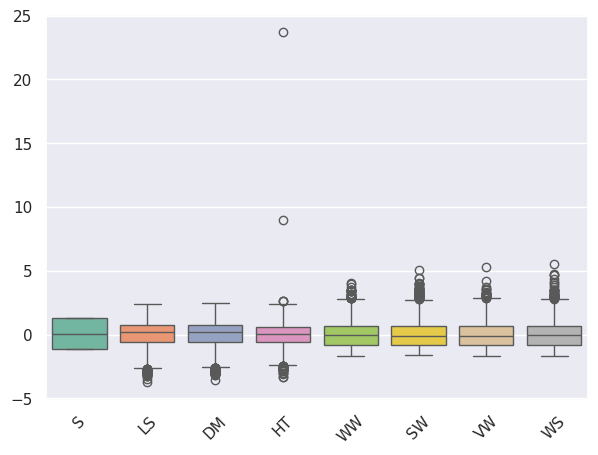

In [ ]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

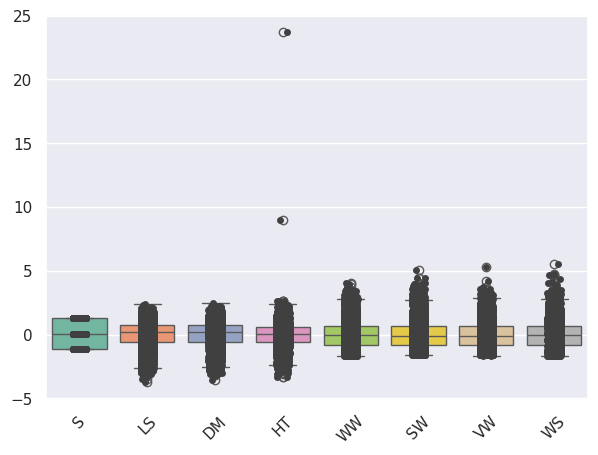

In [ ]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

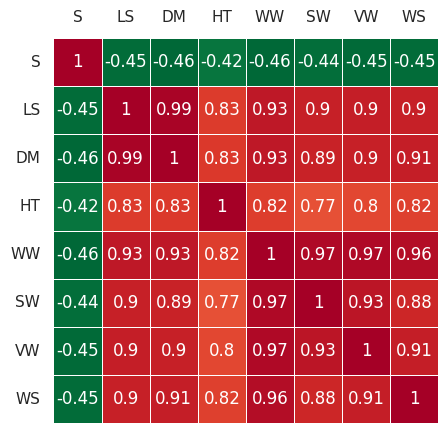

In [ ]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

##**Applying PCA**

Text(0, 0.5, '$Z_2$')

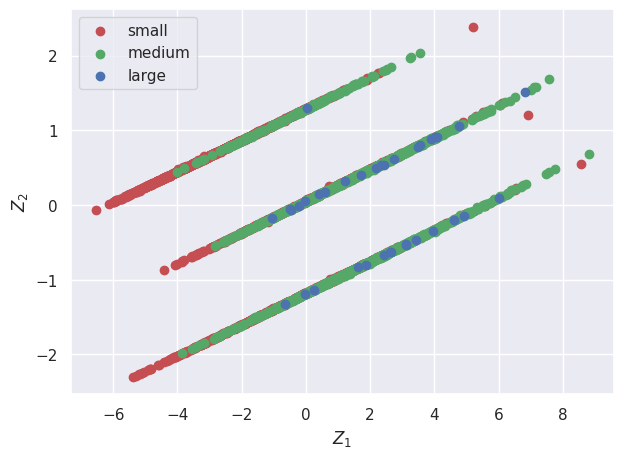

In [ ]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(small)->0,  2(Kmedium)->1, 3(large)->2
idx_Rosa = np.where(y == 'small')
idx_Kana = np.where(y == 'medium')
idx_Canadian = np.where(y == 'large')

plt. figure()
plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='small')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='medium')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='large')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

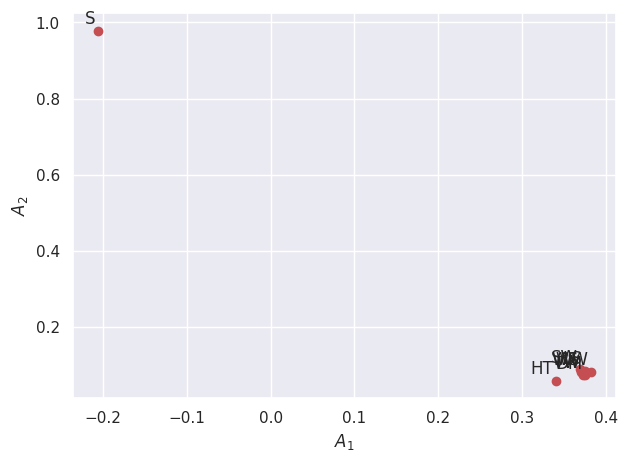

In [ ]:
A = pca.components_.T

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

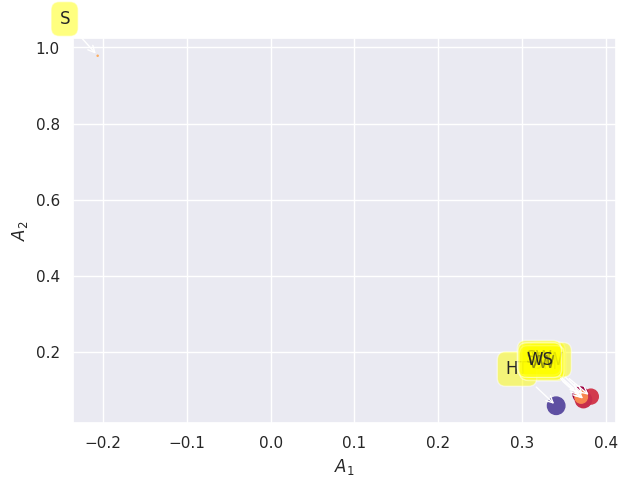

In [ ]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

Text(0, 0.5, 'Explained variance')

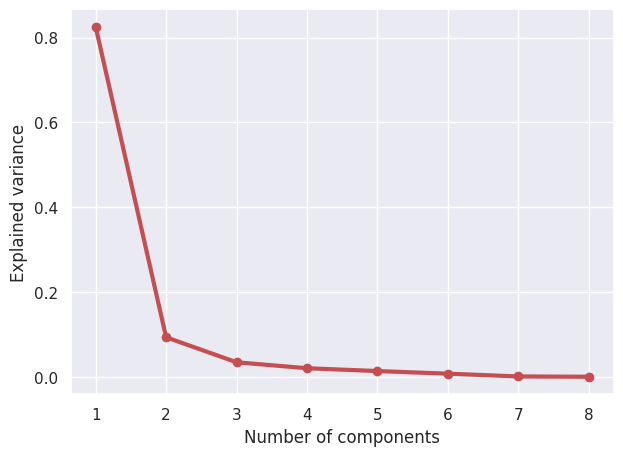

In [ ]:
#Eigenvalues
Lambda = pca.explained_variance_

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

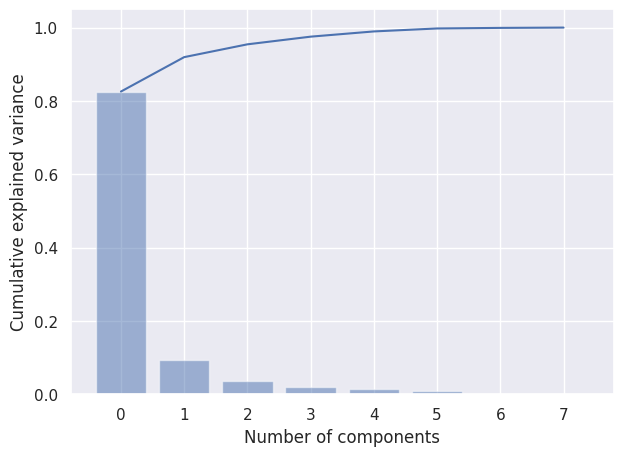

In [ ]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

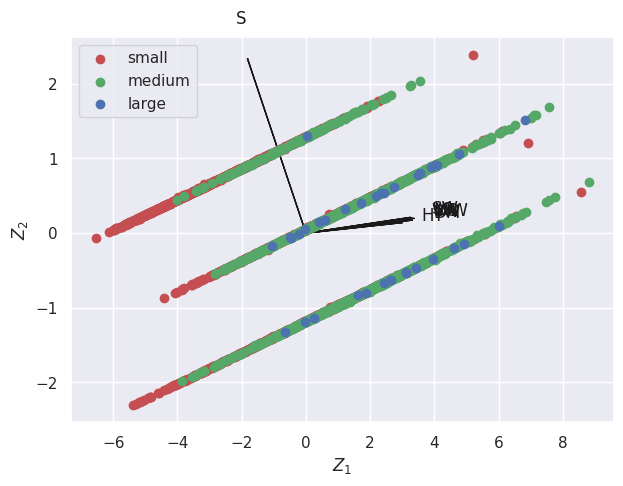

In [ ]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='small')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='medium')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='large')
plt.legend(loc='upper left')

##**Using PCA Library**

In [ ]:
!pip install pca

In [ ]:
from pca import pca
# Initialize and keep all PCs
model = pca(n_components=0.85)
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [85.0%] explained variance using the [8] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [2] that covers the [85.00%] explained variance.
[pca] >The PCA reduction is performed on the [8] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


**Principal Components**

In [ ]:
out['PC']

PC1       PC2
0    -1.479978 -1.485778
1    -3.052013 -1.821987
2    -0.482987 -0.050939
3    -1.238138 -1.445609
4    -3.835864  0.483813
...        ...       ...
4172  0.773172  0.208324
4173  0.942014 -0.974509
4174  2.359221 -0.695470
4175  1.600833  0.397308
4176  5.027148 -0.104084

[4177 rows x 2 columns]

**Scatter plot**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '2 Principal Components explain [95.43%] of the variance'}, xlabel='PC1 (82.5% expl.var)', ylabel='PC2 (9.38% expl.var)'>)

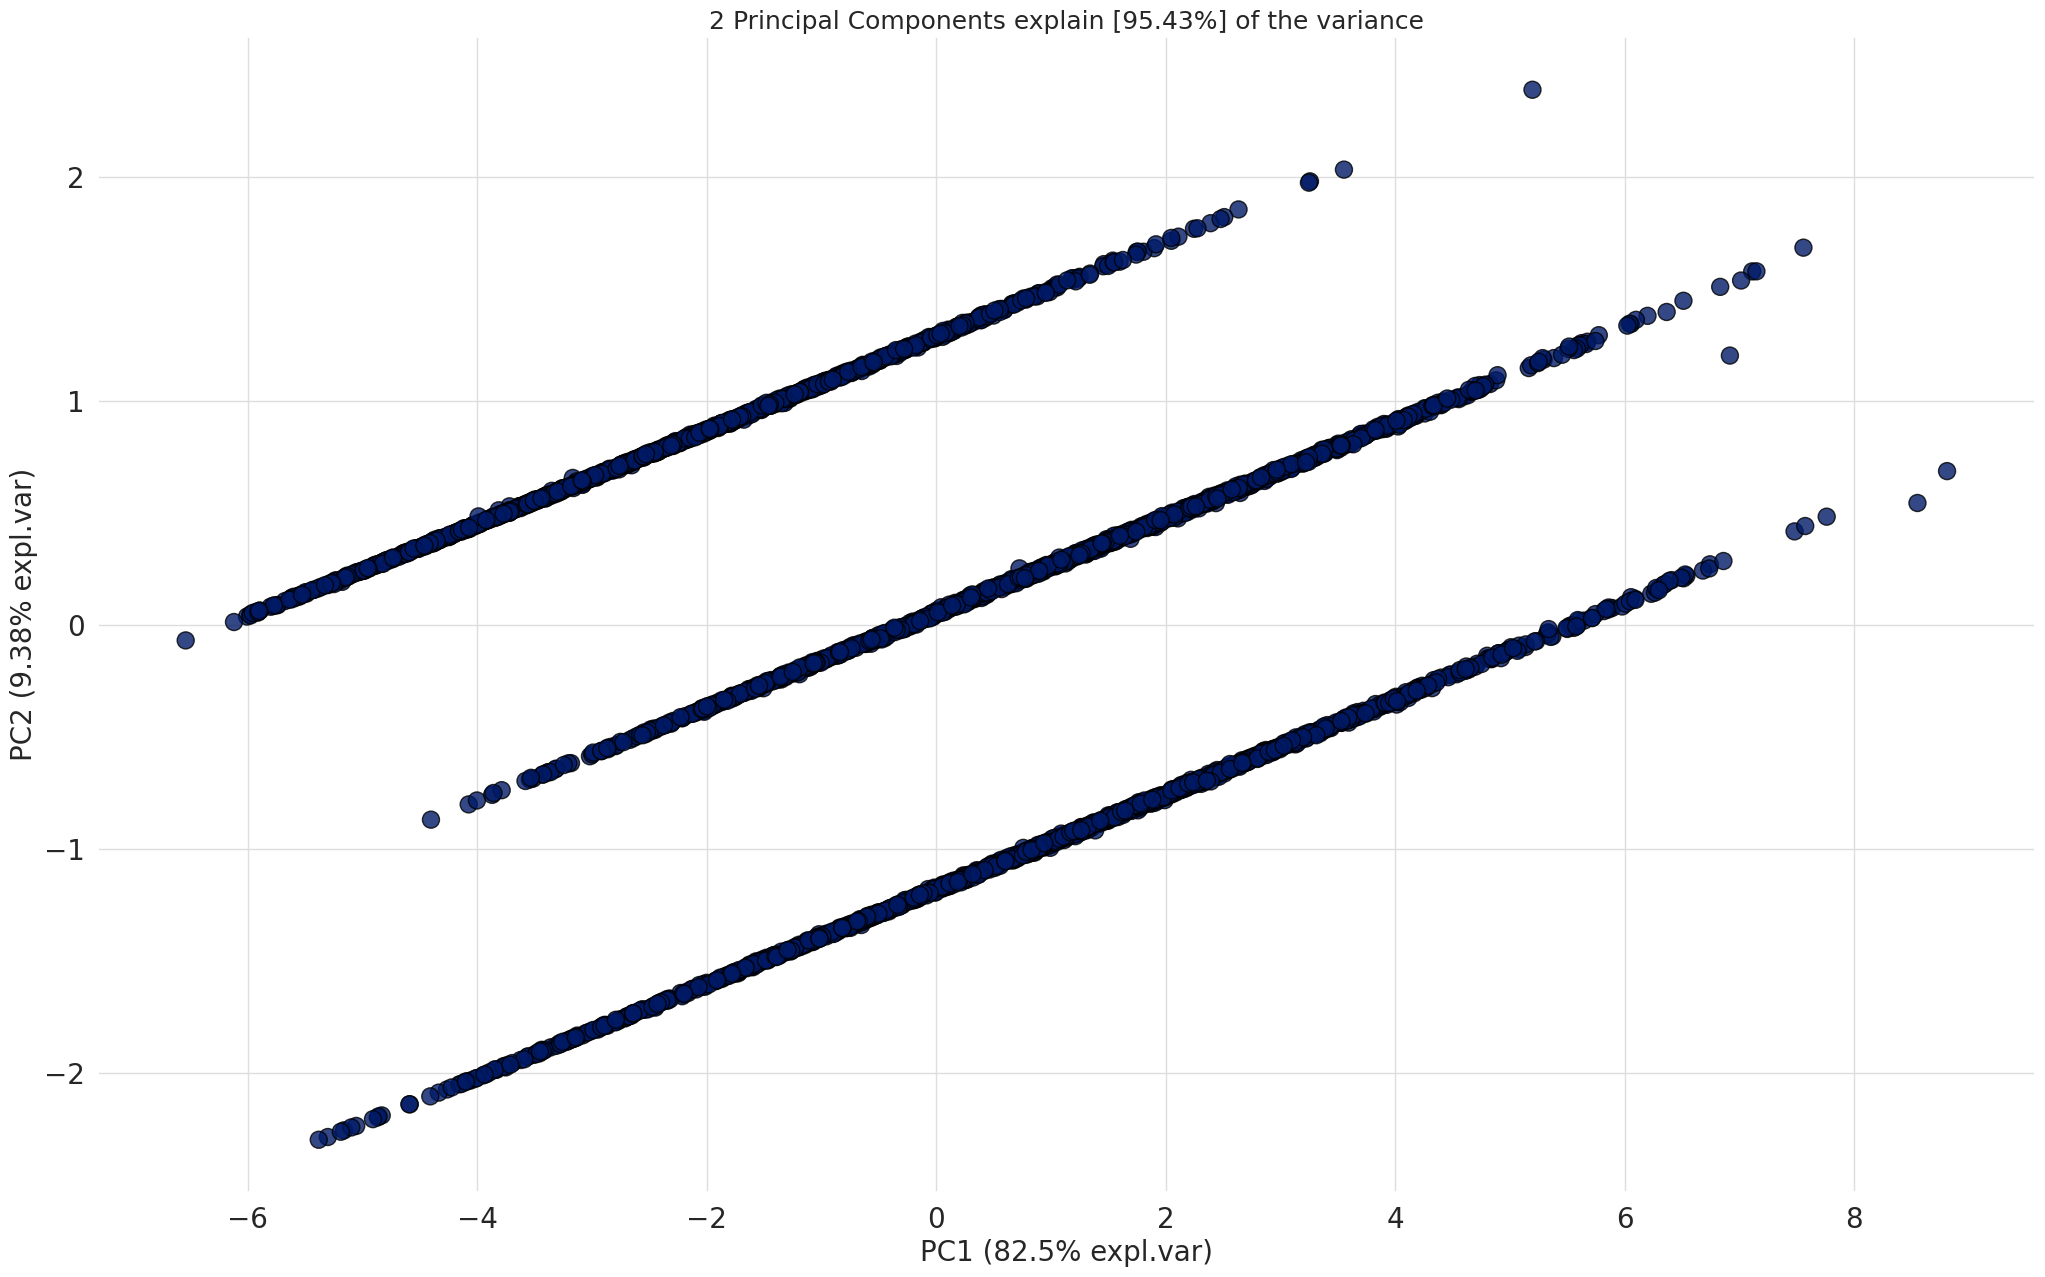

In [ ]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [ ]:
A = out['loadings'].T

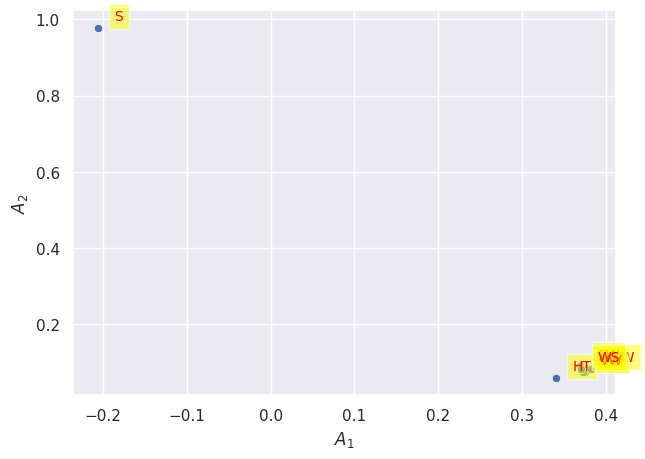

In [ ]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

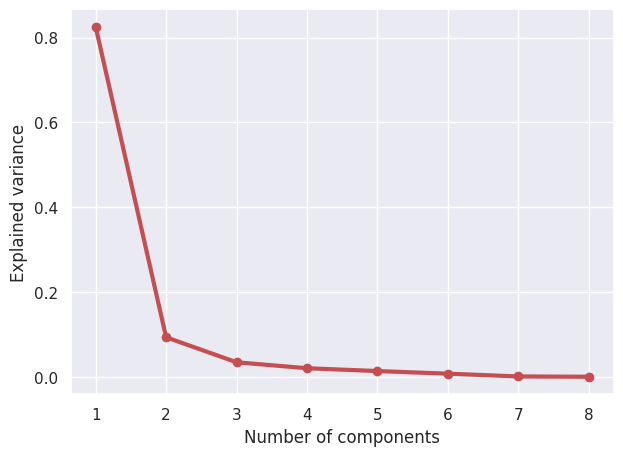

In [ ]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

**Explained Variance Plot**

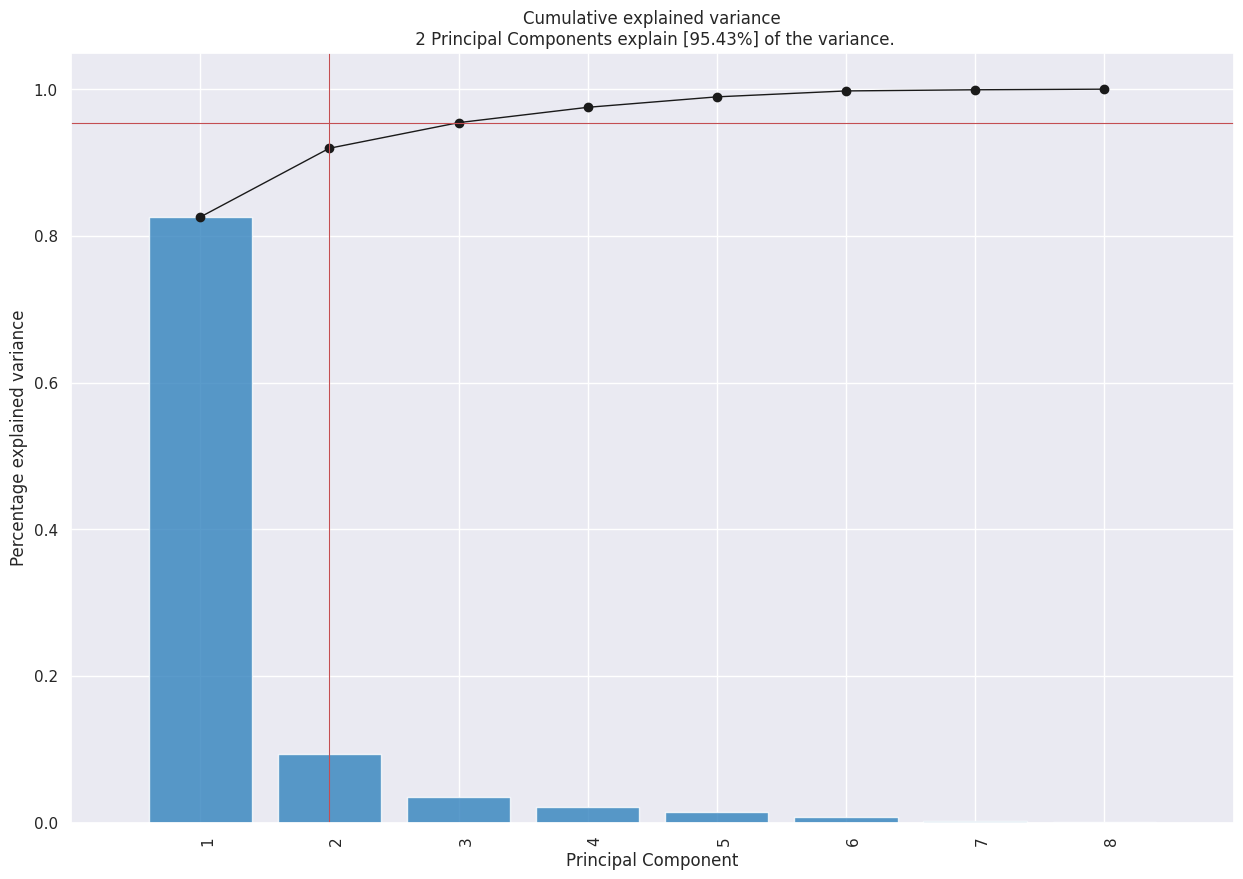

In [ ]:
model.plot();

**Biplot**

A biplot is a graphical representation of multivariate data that displays both observations and variables simultaneously in a single plot. Each observation is represented as a point in a two-dimensional plot, while the variables are represented as arrows or vectors that point in the direction of the greatest variation in the data. The length of the vector indicates the magnitude of the variable, while the angle between two vectors reflects their correlation.

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '2 Principal Components explain [95.43%] of the variance'}, xlabel='PC1 (82.5% expl.var)', ylabel='PC2 (9.38% expl.var)'>)

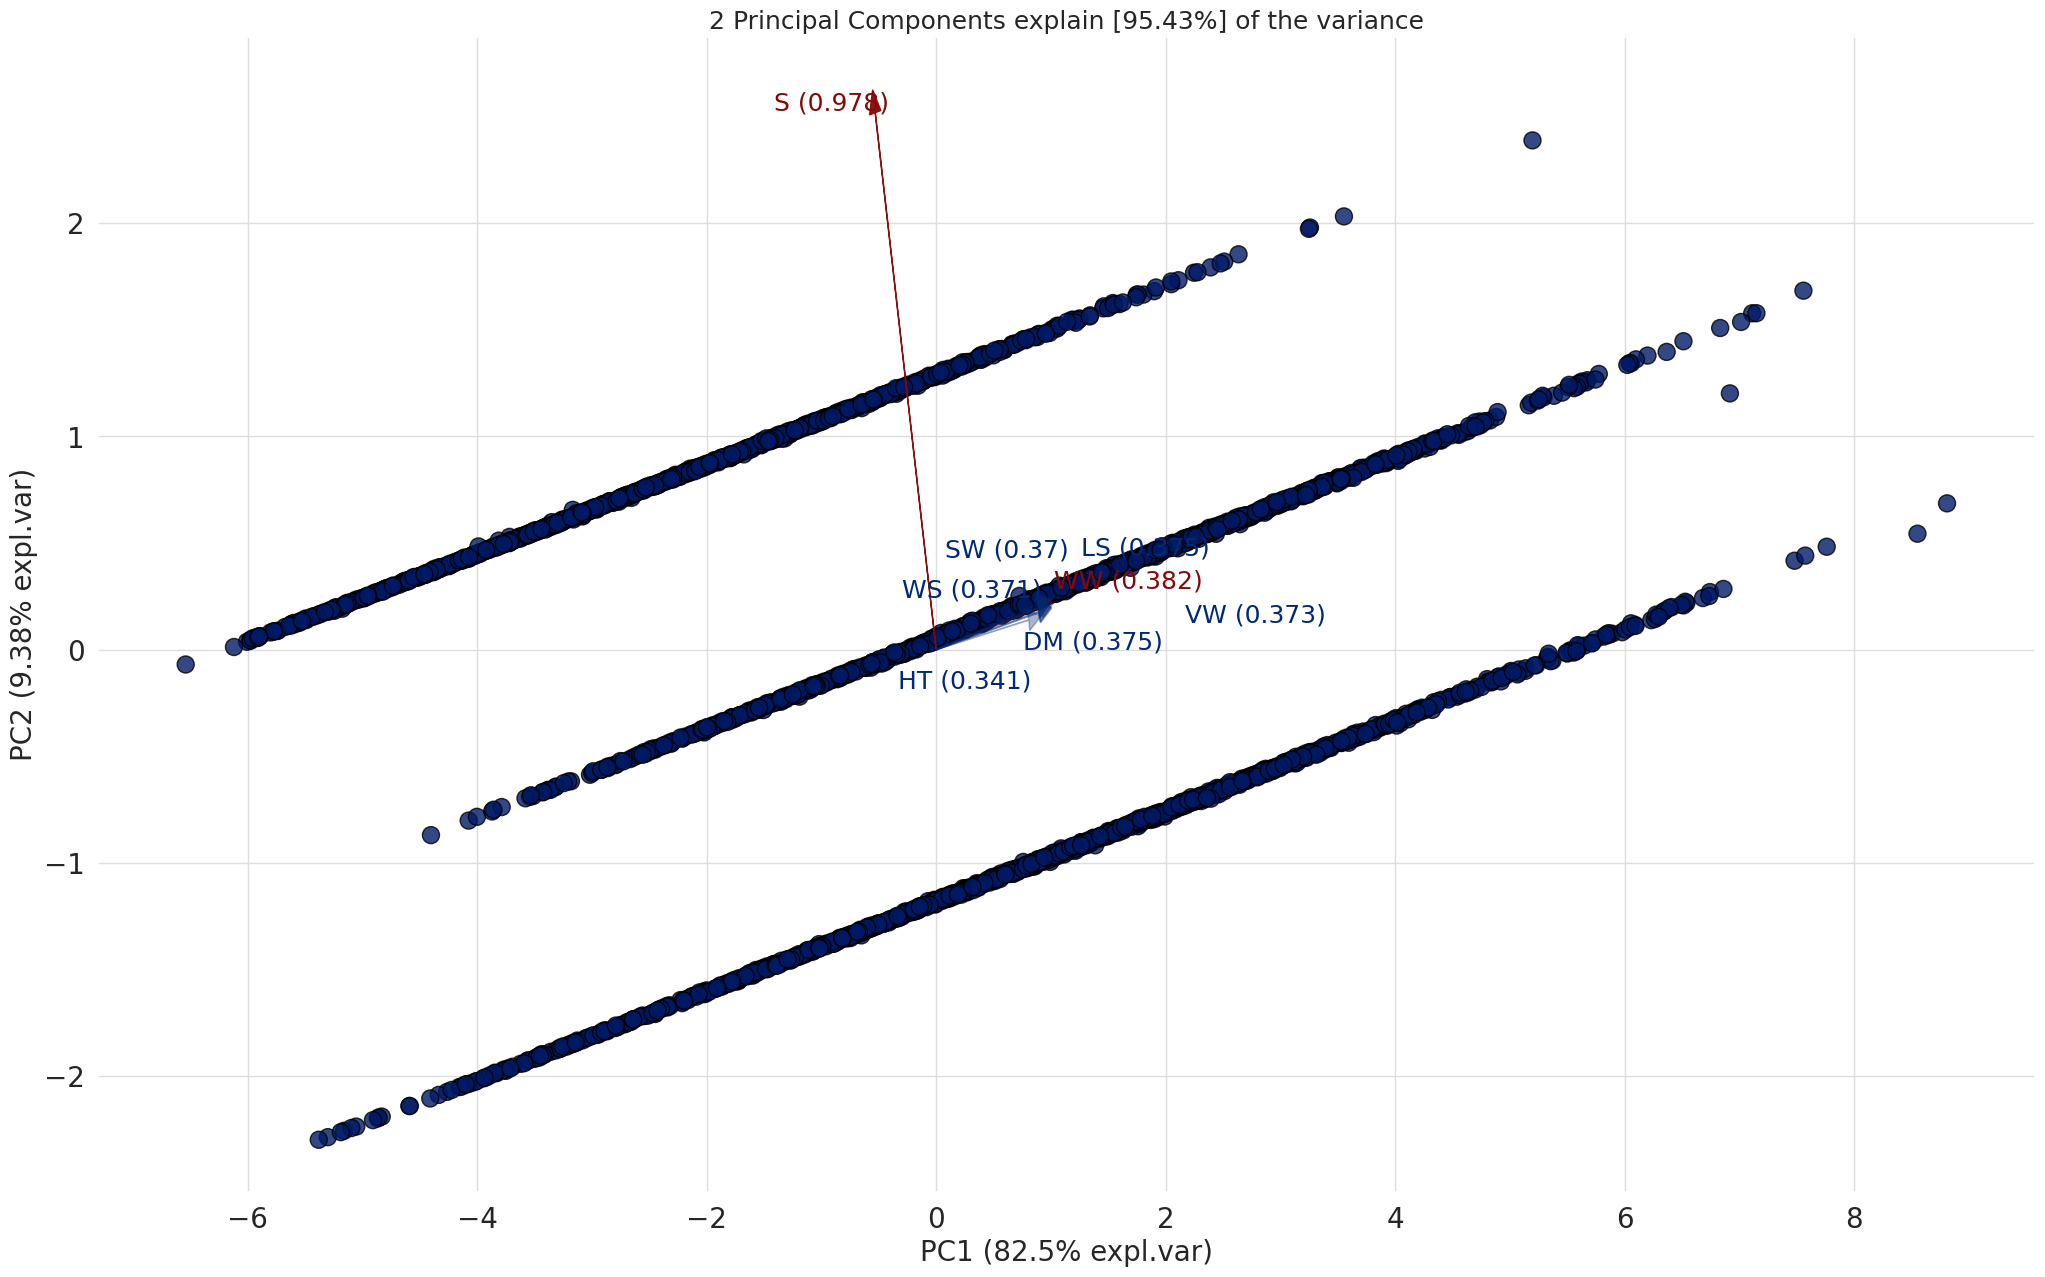

In [ ]:
model.biplot(label=False, legend=False)

#**Multiclass Classification with PyCaret**

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification).

**Data Splitting**

In order to demonstrate the predict_model() function on unseen data, a sample of 21 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 21 records were not available at the time when the machine learning experiment was performed.

In [ ]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (3759, 9)
Unseen Data For Predictions: (418, 9)


**Setting up the Environment in PyCaret**

The **setup()** function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline.

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [ ]:
from pycaret.classification import *
clf = setup(data=data, target='RS', train_size=0.7, session_id=123)

Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

* **session_id** : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

* **Target Type** : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

* **Label Encoded** : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference.

* **Original Data** : Displays the original shape of the dataset. In this experiment (189, 8) means 189 samples and 8 features including the class column.

* **Missing Values** : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

* **Numeric Features** : The number of features inferred as numeric. In this dataset, 7 out of 8 features are inferred as numeric.

* **Categorical Features** : The number of features inferred as categorical. In this dataset, there are no categorical features.

* **Transformed Train Set** : Displays the shape of the transformed training set. Notice that the original shape of (189, 8) is transformed into (132, 7) for the transformed train set.

* **Transformed Test Set** : Displays the shape of the transformed test/hold-out set. There are 57 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline.

**Comparing all Machine Learning Models**

In [ ]:
 #show the best model and their statistics
 best_model = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
best_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

**Create a Model**

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, Recall, Precision, F1, Kappa and MCC by fold.

For the remaining part of this tutorial, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

* Decision Tree Classifier ('dt')
* K Neighbors Classifier ('knn')
* Logistic Regression ('lr')

There are many classifiers available in the model library of PyCaret. Please view the create_model() docstring for the list of all available models.

**Create Decision Tree Classifier**

In [ ]:
dt = create_model('dt')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
#trained model object is stored in the variable 'dt'.
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

**Tune a Model:** How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune Decision Tree Model**

In [ ]:
tuned_dt = tune_model(dt)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
#tuned model object is stored in the variable 'tuned_dt'.
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_samples_leaf=4,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

**Evaluate Decision Tree Model**

How to analyze model performance using various plots

In [ ]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create K Neighbors Model**

In [ ]:
knn = create_model('knn')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune K Neighbors Model**

In [ ]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Evaluate K Neighbors Model**

In [ ]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create Logistic Regression Model**

In [ ]:
lr = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Tune Logistic Regression Model**

In [ ]:
tuned_lr = tune_model(lr)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Evaluate Logistic Regression Model**

In [ ]:
tuned_lr

LogisticRegression(C=3.882, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create Random Forest Model**

In [ ]:
rf = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune Random Forest Model**

In [ ]:
tuned_rf = tune_model(rf)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**Evaluate Random Forest Model**

In [ ]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#**Tune the Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
tuned_best_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='log_loss', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.05, min_samples_leaf=2,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=140, n_iter_no_change=None,
                           random_state=123, subsample=0.35, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#**Classification + PCA**

In [ ]:
clf_pca = setup(data=df, target='RS', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

In [ ]:
#show the best model and their statistics
best_model_pca = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
best_model_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Tune the Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
tuned_best_model_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Note:** The AUC metric is not available for Multiclass classification however the column will still be shown with zero values to maintain consistency between the Binary Classification and Multiclass Classification display grids.

#**Explainable AI with Shapley values**

Shapley values are a widely used approach from cooperative game theory that come with desirable properties.

In [ ]:
rf_pca = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_rf_pca = tune_model(rf_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**SHAP Summary Plot**

Rather than using a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples.

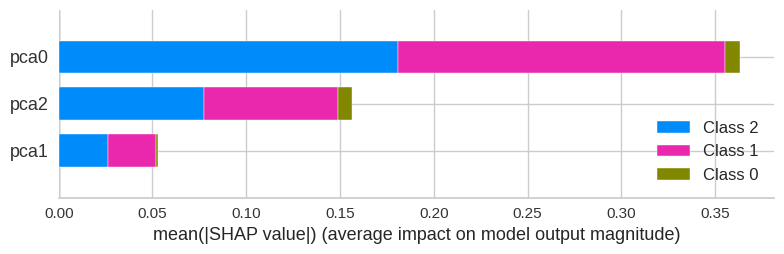

In [ ]:
interpret_model(tuned_rf_pca, plot='summary')

In [ ]:
#explainer = shap.TreeExplainer(tuned_rf_pca)
#X = df.drop('class', axis=1)
#shap_values = explainer.shap_values(X)
#shap.summary_plot(shap_values, X)

**Visualize a single prediction**

In [ ]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

From the above the plot, we can see the "base value," which is defined as the mean predicted target; and f(x), which is the prediction for a selected observation (i.e. observation number 32). The red-colored features increased the predicted value, while the blue-colored features decreased it. The size of each feature (i.e. Principal Component) indicates the impact it has on the model.

**Visualize many predictions**

In [ ]:
interpret_model(tuned_rf_pca, plot='reason')